# DAVID visualization

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

#

def preprocess_david(data):
    # GeneRatio = Count / List Total
    data['GeneRatio'] = data['Count']/data['List Total']

    # BgRatio = Pop Hits / Pop Total
    data['BgRatio'] = data['Pop Hits'] / data['Pop Total']
    
    # Fisher E
    data['-log10(PValue)'] = np.log10(data['PValue'])
    data['-log10(PValue)'] *= -1

    # Replace 0 to min values
    # pvals = ['PValue', 'Bonferroni', 'Benjamini']
    # for pval in pvals:
    #     min_non_zero = data[pval][data[pval] != 0].min
    #     data[pval] = data[pval].replace(0, min_non_zero)
    return data


def pick_go_term_up(data, type="bp", p="fisher", top=10):   
    # Terms
    if type == "bp":
        data_tmp = data[data['Category'] == "GOTERM_BP_DIRECT"]
    elif type == "cc":
        data_tmp = data[data['Category'] == "GOTERM_CC_DIRECT"]
    elif type == "mf":
        data_tmp = data[data['Category'] == "GOTERM_MF_DIRECT"]
    elif type == "kegg":
        data_tmp = data[data['Category'] == "KEGG_PATHWAY"]
    else:
        raise ValueError

    # Fold-enrichment into log2 scale
    # data_tmp['Fold Enrichment'] = np.log2(data_tmp['Fold Enrichment'])
    data_tmp.loc[:,'Fold Enrichment'] = np.log2(data_tmp.loc[:, 'Fold Enrichment'])

    # p
    data_p = data_tmp[data_tmp['FDR'] <= 0.01]
    data_sort = data_p.sort_values(by="Fold Enrichment", ascending=False)
    data = data_sort[:top]
    return data


def pick_go_term_down(data, type="bp", p="fisher", top=10):   
    # Terms
    if type == "bp":
        data_tmp = data[data['Category'] == "GOTERM_BP_DIRECT"]
    elif type == "cc":
        data_tmp = data[data['Category'] == "GOTERM_CC_DIRECT"]
    elif type == "mf":
        data_tmp = data[data['Category'] == "GOTERM_MF_DIRECT"]
    elif type == "kegg":
        data_tmp = data[data['Category'] == "KEGG_PATHWAY"]
    else:
        raise ValueError

    # Fold-enrichment into log2 scale
    # data_tmp['Fold Enrichment'] = np.log2(data_tmp['Fold Enrichment'])
    data_tmp.loc[:,'Fold Enrichment'] = np.log2(data_tmp.loc[:, 'Fold Enrichment'])

    # p
    data_p = data_tmp[data_tmp['FDR'] <= 0.01]
    data_sort = data_p.sort_values(by="Fold Enrichment", ascending=False)
    data_sort['Fold Enrichment'] *= -1
    data_sort['Term'] = ' '+ data_sort['Term']
    data = data_sort[:top]
    return data

In [5]:
import os
import pandas as pd

USER = os.getcwd()
DPATH1 = '../../example/maxquant_opendata/mq_open-david.txt'

df = pd.read_csv(filepath_or_buffer=DPATH1, sep='\t', encoding='utf-8')
df.head()

,Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
0,GOTERM_CC_DIRECT,GO:0070062~extracellular exosome,738,51.178918,0.000000e+00,"P04114, Q7KZF4, P32942, K7EKF6, Q96TA1, O14672...",1435,2241,20521,4.709352,0.000000e+00,0.000000e+00,0.000000e+00
1,GOTERM_CC_DIRECT,GO:0005576~extracellular region,653,45.284327,1.008258e-279,"P04114, Q06141, P48052, O14791, P52790, P10912...",1435,2172,20521,4.299322,7.007390e-277,3.503695e-277,2.979401e-277
2,GOTERM_CC_DIRECT,GO:0005615~extracellular space,543,37.656033,8.504262e-208,"P04114, K7EKF6, Q06141, P48052, O14791, O14793...",1435,1931,20521,4.021279,5.910462e-205,1.970154e-205,1.675340e-205
3,GOTERM_CC_DIRECT,GO:0005788~endoplasmic reticulum lumen,147,10.194175,1.812291e-85,"P04114, P02452, O15240, P55268, P07108, O14791...",1435,310,20521,6.781133,1.259542e-82,3.148856e-83,2.677660e-83
4,INTERPRO,IPR013783:Ig-like_fold,259,17.961165,5.663810e-71,"P01880, Q92859, P32942, Q9UQP3, P10912, A0A075...",1439,1119,20603,3.313900,1.396695e-67,1.396695e-67,1.247171e-67


In [6]:
df_ready = preprocess_david(df)
df_plot = pick_go_term_up(df_ready, type="cc")

c:\Users\simhc\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\simhc\AppData\Local\Temp\ipykernel_2636\3864511679.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp.loc[:,'Fold Enrichment'] = np.log2(data_tmp.loc[:, 'Fold Enrichment'])


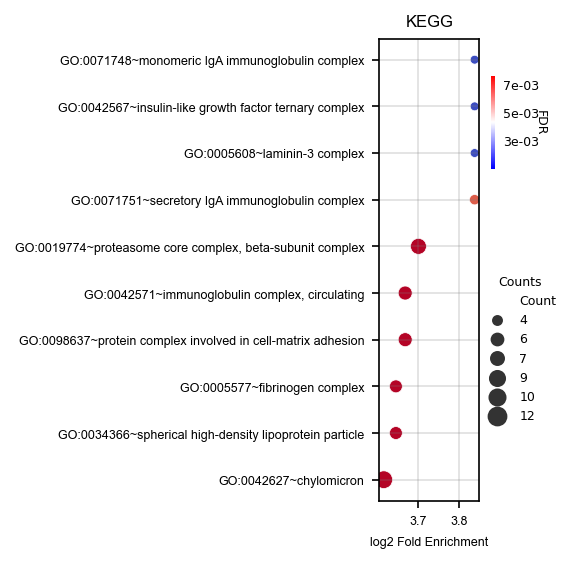

In [7]:
import matplotlib.cm as cm
import matplotlib as mpl

# GeneOntology Dot Plot Generator
font = {'family':'Arial',
        'weight':'normal',
        'size':6}
font_ticks = {'family':'Arial',
              'weight':'normal',
              'size':6}
spectrum_colors = sns.color_palette("coolwarm_r", as_cmap=True)


fig = plt.figure(figsize=(1, 4), dpi=150, facecolor="none")
scatterplot = sns.scatterplot(data=df_plot, x="Fold Enrichment", y="Term", size="Count", hue="FDR", palette='coolwarm_r', legend="brief")

# Custom legends
h, l = scatterplot.get_legend_handles_labels()
plt.legend(h[6:], l[6:], bbox_to_anchor=(1.0, 0.5), loc="upper left", title="Counts", frameon=False, borderaxespad=0., fontsize=6, title_fontsize=6)


# ColorBar
cmap = cm.bwr
vmin = df_plot['FDR'].min()
vmax = df_plot['FDR'].max()
vmm = vmin + vmax
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=plt.gca(), fraction=0.04, pad=0.1, anchor=(1.0, 0.9), format='%.0e')
cbar.ax.spines['outline'].set_visible(False) # outline remove
cbar.ax.tick_params(size=0, labelsize=6) # remove ticks
cbar.set_label('FDR', rotation=270, size=6)


# Details
plt.title('KEGG', font='Arial', size=8)
plt.xlabel("log2 Fold Enrichment", fontdict=font)
plt.ylabel(None)
plt.xticks(fontproperties=font_ticks)
plt.yticks(fontproperties=font_ticks)

# Add grid lines to both x and y axes with gray color and a lower z-order
plt.grid(True, color='gray', linewidth=0.2, zorder=0)

plt.show()